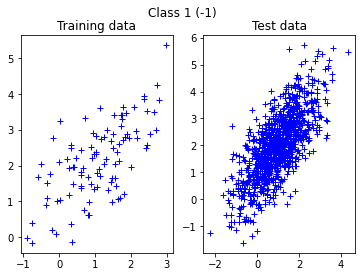

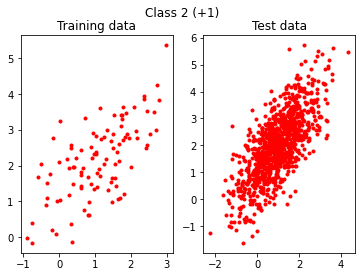

In [ ]:
### (a) Data generation
import numpy as np
import matplotlib.pyplot as plt

# class 1 data
mu1 = [1, 2]
sigma1 = np.array([[1, 0.9], [0.9, 1.5]])
# fix a random seed to reproduce the random dataset
np.random.seed(42)
x1train = np.random.multivariate_normal(mu1, sigma1, 100)
x1test = np.random.multivariate_normal(mu1, sigma1, 1000)

# plot x_train and x_test subplots
ax1 = plt.subplot(1, 2, 1)
ax1.plot(x1train[:,0], x1train[:,1], 'b+')
ax1.title.set_text('Training data')
ax2 = plt.subplot(1, 2, 2)
ax2.plot(x1test[:,0], x1test[:,1], 'b+')
ax2.title.set_text('Test data')
plt.suptitle('Class 1 (-1)')
plt.show()

# class 2 data
mu2 = [3, 0]
sigma2 = np.array([[1, 0.1], [0.1, 2]])
x2train = np.random.multivariate_normal(mu2, sigma2, 100)
x2test = np.random.multivariate_normal(mu2, sigma2, 1000)

# plot x_train and x_test subplots
ax1 = plt.subplot(1, 2, 1)
ax1.plot(x1train[:,0], x1train[:,1], 'r.')
ax1.title.set_text('Training data')
ax2 = plt.subplot(1, 2, 2)
ax2.plot(x1test[:,0], x1test[:,1], 'r.')
ax2.title.set_text('Test data')
plt.suptitle('Class 2 (+1)')
plt.show()

In [ ]:
### miscellaneous functions
# mse calculation
def mse(y_actual, y_pred):
  error = 0
  
  for y, y_prime in zip(y_actual, y_pred):
      error += (y - y_prime) ** 2
  
  return error


### (e)(i) function to calculate accuracy of predictions
def ClassAcc(ytest, ypred):
  right = 0
  wrong = 0
  if (len(ytest) != len(ypred)):
    raise ValueError("Test and prediction lengths are not matched.")
  
  for i in range(0, len(ytest)):
    if ytest[i] == ypred[i]:
      right += 1
    else:
      wrong += 1
  
  testClassificationAcc = (right / (right + wrong)) * 100
  return testClassificationAcc


# setting threshold to return predicted values to labels
def Relabel(labeled_y):
  ypred = np.empty((labeled_y.shape))
  for i in range(0, ypred.shape[0]):
    if labeled_y[i] > 0:
      ypred[i] = 1
    elif labeled_y[i] < 0:
      ypred[i] = -1
  
  return ypred


# function to plot graph with boundaries
def plot_graph(X, weightsLinear):
  # get gradient and intercept for decision
  b = weightsLinear[0]
  w1 = weightsLinear[1]
  w2 = weightsLinear[2]
  c = -b/w2
  m = -w1/w2
  xmin, xmax = -2, 5.5
  ymin, ymax = -1, 2.5
  x = np.array([xmin, xmax])
  bound_y = m*x + c

  plt.plot(x, bound_y, 'g', label='fitted line', linestyle='solid')
  half_bound = int(X.shape[0]/2)
  plt.plot(X[:half_bound,0], X[:half_bound,1], 'b+')
  plt.plot(X[half_bound:,0], X[half_bound:,1], 'r.')

In [ ]:
### (b) mean and covariance functions
def mean(train_data):
  mean = np.sum(train_data)/len(train_data)
  return mean

def covariance(train_data, mean):
  new_x = np.empty((train_data.shape))
  for i in range(0, len(train_data)):
    new_x[i] = train_data[i] - mean

  prd = new_x.dot(new_x.T)
  covar = np.sum(prd)/(len(train_data) - 1)
  return covar

x1_mean = np.append(mean(x1train[:,0]), mean(x1train[:,1]))
x1_cov = np.append(covariance(x1train[:,0], x1_mean[0]), covariance(x1train[:,1], x1_mean[1]))
print("mu_1:", x1_mean)
print("Sigma_1:", x1_cov)

x2_mean = np.append(mean(x2train[:,0]), mean(x2train[:,1]))
x2_cov = np.append(covariance(x2train[:,0], x2_mean[0]), covariance(x2train[:,1], x2_mean[1]))
print("mu_2:", x2_mean)
print("Sigma_2:", x2_cov)

mu_1: [1.08812405 2.14754118]
Sigma_1: [0.80835157 1.1083738 ]
mu_2: [3.03215075 0.0839338 ]
Sigma_2: [0.99117009 1.56736259]


In [ ]:
# append training and testing sets
Xtrain = np.append(x1train, x2train, axis=0)
Xtest = np.append(x1test, x2test, axis=0)
ytrain = np.append(-1 * np.ones((100, 1)), np.ones((100, 1)), axis=0)
ytest = np.append(-1 * np.ones((1000, 1)), np.ones((1000, 1)), axis=0)

Accuracy of the model: 99.45%, MSE: [44.]


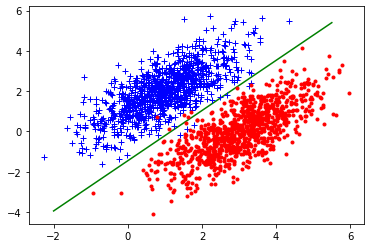

In [ ]:
### (c)(i) train linear regression model
def TrainLinear(Xtrain, ytrain):
  # train the matrix
  I = np.eye(Xtrain.T.dot(Xtrain).shape[0])
  b = 1e-4
  # weight coefficients (alpha)
  weightsLinear = np.linalg.inv((Xtrain.T).dot(Xtrain) + b*I).dot(Xtrain.T).dot(ytrain)
  # predict on train
  ytrainLinear = Xtrain.dot(weightsLinear)

  return ytrainLinear, weightsLinear


### (c)(ii) obtain predictions from test dataset (linear regression)
def TestLinear(Xtest,weightsLinear):
  ytestLinear = Xtest.dot(weightsLinear)

  return ytestLinear


# append bias (1) to train set, then train linear regression
ytrain = np.reshape(ytrain, -1)
Xtrain_ = np.ones((Xtrain.shape[0], 1))
Xtrain_ = np.concatenate((Xtrain_, Xtrain), axis = 1)
ytrainLinear, weightsLinear = TrainLinear(Xtrain_, ytrain)

# append bias (1) to test set, then obtain prediction from trained weights
Xtest_ = np.ones((Xtest.shape[0], 1))
Xtest_ = np.concatenate((Xtest_, Xtest), axis = 1)
ytestLinear = TestLinear(Xtest_, weightsLinear)

### (c)(iii) calculate accuracy and plot graph
ypredLinear = Relabel(ytestLinear)
acc = ClassAcc(ytest, ypredLinear)
mseLinear = mse(ytest, ypredLinear)
print("Accuracy of the model: {}%, MSE: {}".format(acc, mseLinear))
plot_graph(Xtest, weightsLinear)

[-4.45817222e-01 -2.96394425e+00  5.10345104e+00  3.24703721e+00
 -5.78319263e+00  2.16803993e-03  5.60603198e-03  7.91021273e-02
  8.05727812e-02 -2.76038842e-02  9.99987683e-03  4.10014303e-03
 -7.54405559e-03  4.09961211e-03 -7.54383867e-03  1.42145523e-05
  7.23673440e-05]
Accuracy of the model: 98.5 %, MSE: [120.]


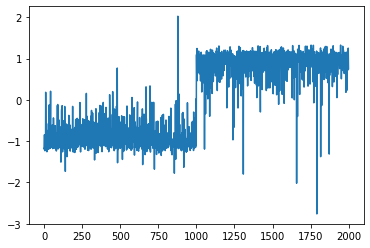

In [ ]:
### (d)(i) train RM model
def TrainRM(Xtrain, ytrain, order):
  X = Xtrain
  [m, l] = X.shape
  MM1 = []
  MM3 = []
  P = []
  Msum = np.sum(X, axis=1)
  M1 = np.empty((X.shape))
  M3 = np.empty((X.shape))

  for i in range(0, order):
    for k in range(0, l):
      M1[:, k] = np.power(X[:, k], i)
      if i > 1:
        M3[:, k] = np.power(np.multiply(X[:, k], Msum), (i - 1))

    if len(MM1) == 0:
      MM1 = M1
    else:
      MM1 = np.concatenate((MM1, M1), axis = 1)

    if i > 1:
      if len(MM3) == 0:
        MM3 = M3
      else:
        MM3 = np.concatenate((MM3, M3), axis = 1)

  P = np.ones((m, 1))
  if len(MM3) > 0:
    P = np.concatenate((np.concatenate((P, MM1), axis = 1), MM3), axis = 1)
  elif len(MM1) > 0:
    P = np.concatenate((P, MM1), axis = 1)

  # train the matrix
  I = np.eye(P.T.dot(P).shape[0])
  b = 1e-4
  # weight coefficients (alpha)
  weightsRM = np.linalg.inv((P.T).dot(P) + b*I).dot(P.T).dot(ytrain)
  # output ytrain
  ytrainRM = P.dot(weightsRM)

  return ytrainRM, weightsRM


### (d)(ii) obtain predictions from test dataset (RM)
def TestRM(Xtest, weightsRM, order):
  X = Xtest
  [m, l] = X.shape
  MM1 = []
  MM3 = []
  Pt = []
  Msum = np.sum(X, axis=1)
  M1 = np.empty((X.shape))
  M3 = np.empty((X.shape))

  for i in range(0, order):
    for k in range(0, l):
      M1[:, k] = np.power(X[:, k], i)
      if i > 1:
        M3[:, k] = np.power(np.multiply(X[:, k], Msum), (i - 1))

    if len(MM1) == 0:
      MM1 = M1
    else:
      MM1 = np.concatenate((MM1, M1), axis = 1)

    if i > 1:
      if len(MM3) == 0:
        MM3 = M3
      else:
        MM3 = np.concatenate((MM3, M3), axis = 1)

  Pt = np.ones((m, 1))
  if len(MM3) > 0:
    Pt = np.concatenate((np.concatenate((Pt, MM1), axis = 1), MM3), axis = 1)
  elif len(MM1) > 0:
    Pt = np.concatenate((Pt, MM1), axis = 1)

  # generate ytest = Pt * alpha
  ytestRM = Pt.dot(weightsRM)

  return ytestRM

order = 5
ytrainRM, weightsRM = TrainRM(Xtrain, ytrain, order)
ytestRM = TestRM(Xtest, weightsRM, order)

### (d)(iii) plot decision boundary for 5th order RM
plot_graph(Xtest, weightsRM)

# predict outputs and calculate accuracy of the model
ypredRM = Relabel(ytestRM)
mseRM = mse(ytest, ypredRM)
RMacc = ClassAcc(ytest, ypredRM)
print("Accuracy of the model: {} %, MSE: {}".format(RMacc, mseRM))

# plot the predicted outputs
# plt.plot(ytestRM)

In [ ]:
### (e)(ii)plotting the accuracy for orders 1-10
plt.plot(weightsRM)
plt.plot(weightsLinear)
# accuracy matrix obtained from previous calculations
acc_mat = np.array([0, 0.9945, 0.9940, 0.9805, 0.9850, 0.9830, 0.9740, 0.9730, 0.9685, 0.9610])
plt.scatter(np.arange(1, 11, 1), acc_mat, marker='x')
plt.xticks(range(1, 11))
plt.plot(np.arange(1, 11, 1), acc_mat)
plt.xlabel('Order')
plt.ylabel('Accuracy')